# Perte de charge (singuliere vs reguliere)

On teste la PDC regulière et singulière en Pb_hydralique et pb_multiphase en VDF, PolyMAC_P0P1NC et PolyMAC_P0.
Le choix a ete fait pour avoir la meme PDC en regulière et singulière.

Singulière : sur une face à l'intérieur du domaine, regulière sur plusieurs mailles à l'intérieur du domaine. On voit bien l'égalité de la pression à l'entrée et la sortie du canal.

In [ ]:
from trustutils import run

run.introduction("Yannick Gorsse & Elie Saikali")

## Introduction 
 Validation made by : Yannick Gorsse, Elie Saikali



 Report generated 05/03/2025

### Description: 



In [ ]:
import os
run.reset()
run.initBuildDirectory()

list_dis = {"VDF" : ["jdd.data", "jdd_pb_multi.data"], 
            "PolyMAC_P0P1NC" : ["jdd.data", "jdd_pb_multi.data"], 
            "PolyMAC_P0" : ["jdd.data", "jdd_pb_multi.data"]}

h_grids = [0.3]
z_grid = 0.5
k = 10.0

for d, dd, ddd in dis:
    run.addCaseFromTemplate("canal.data", f"{d}", {"dis" : d , "poly" : dd, "opts" : ddd})

run.printCases()
run.runCases()
run.tablePerf()

for dis, jdds in list_dis.items():
    for jdd in jdds:
        os.system(f"mkdir -p {run.BUILD_DIRECTORY}/{dis}/case_Ks")
        pdc = f"perte_charge_singuliere {{ dir KY coeff {k} surface {{ y = {z_grid} grille orientation Champ_Uniforme 2 0 1 }} }}"
        with open(f"{build_dir}/{jdd}", "r") as file: filedata = Template(file.read())
        result = filedata.substitute({"zb" : z_grid - 0.1, "zt" : z_grid + 0.1,"pdc" : pdc, "dis" : dis})
        with open(f"{run.BUILD_DIRECTORY}/{dis}/case_Ks/{jdd}", "w") as file: file.write(result)
        run.addCase(f"{dis}/case_Ks", jdd)
        for h in h_grids:
            os.system(f"mkdir -p {run.BUILD_DIRECTORY}/{dis}/case_{h:3.1f}")
            pdc = f"perte_charge_isotrope {{ diam_hydr champ_uniforme 1 {h} lambda {k} sous_zone grille }}"
            with open(f"{build_dir}/{jdd}", "r") as file: filedata = Template(file.read())
            result = filedata.substitute({"zb" : z_grid - 0.5 * h, "zt" : z_grid + 0.5 * h,"pdc" : pdc, "dis" : dis})
            with open(f"{run.BUILD_DIRECTORY}/{dis}/case_{h:3.1f}/{jdd}", "w") as file: file.write(result)
            run.addCase(f"{dis}/case_{h:3.1f}", jdd)

run.printCases()
run.runCases()


### Test cases 
* VDF/case_Ks/jdd.data 
* VDF/case_0.3/jdd.data 
* VDF/case_Ks/jdd_pb_multi.data 
* VDF/case_0.3/jdd_pb_multi.data 
* PolyMAC_P0P1NC/case_Ks/jdd.data 
* PolyMAC_P0P1NC/case_0.3/jdd.data 
* PolyMAC_P0P1NC/case_Ks/jdd_pb_multi.data 
* PolyMAC_P0P1NC/case_0.3/jdd_pb_multi.data 
* PolyMAC_P0/case_Ks/jdd.data 
* PolyMAC_P0/case_0.3/jdd.data 
* PolyMAC_P0/case_Ks/jdd_pb_multi.data 
* PolyMAC_P0/case_0.3/jdd_pb_multi.data 


Running ...
  => A total of 12 cases were (successfully) run in 9.5s.


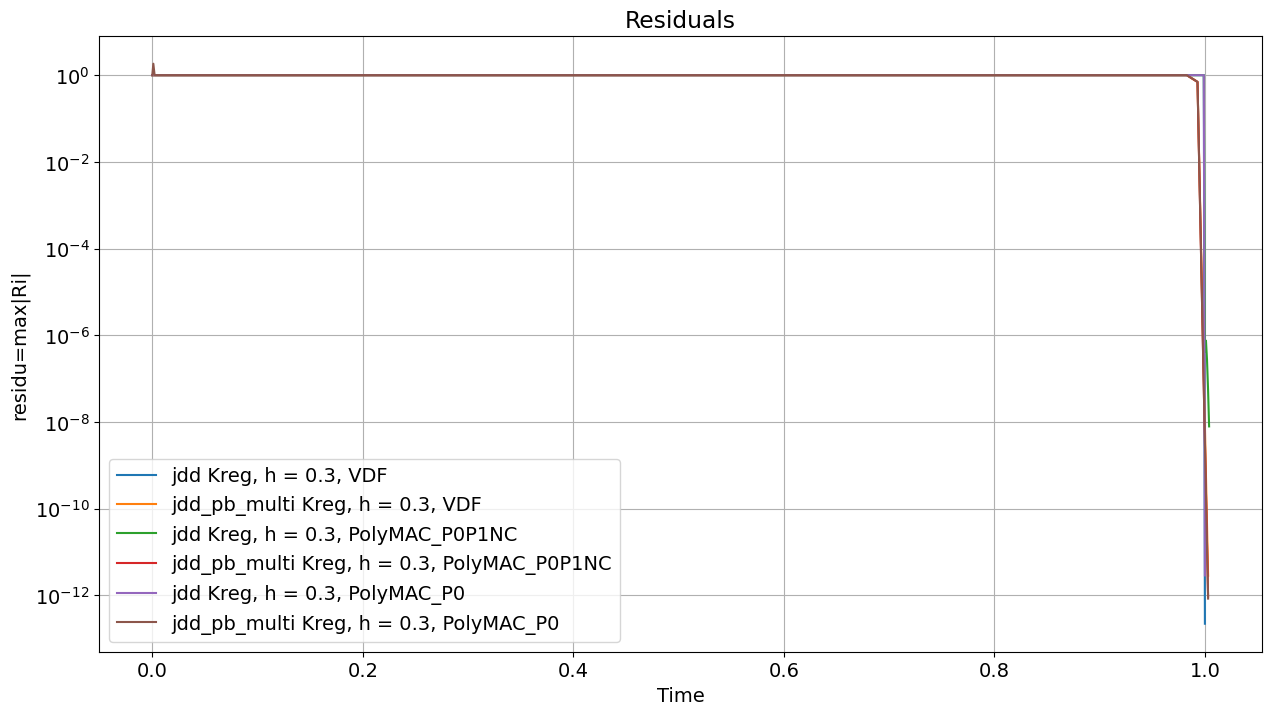

In [15]:
from trustutils import plot

Graph = plot.Graph("Residuals", size=[15, 8])
for dis, jdds in list_dis.items():
    for jdd in jdds:
        for h in h_grids:
            l = "Ksing" if h == "Ks" else f"Kreg, h = {h}"
            Graph.addResidu(f"{dis}/case_{h:3.1f}/{jdd[:-5]}.dt_ev", label=f"{jdd[:-5]} {l}, {dis}")

Graph.scale(yscale="log")


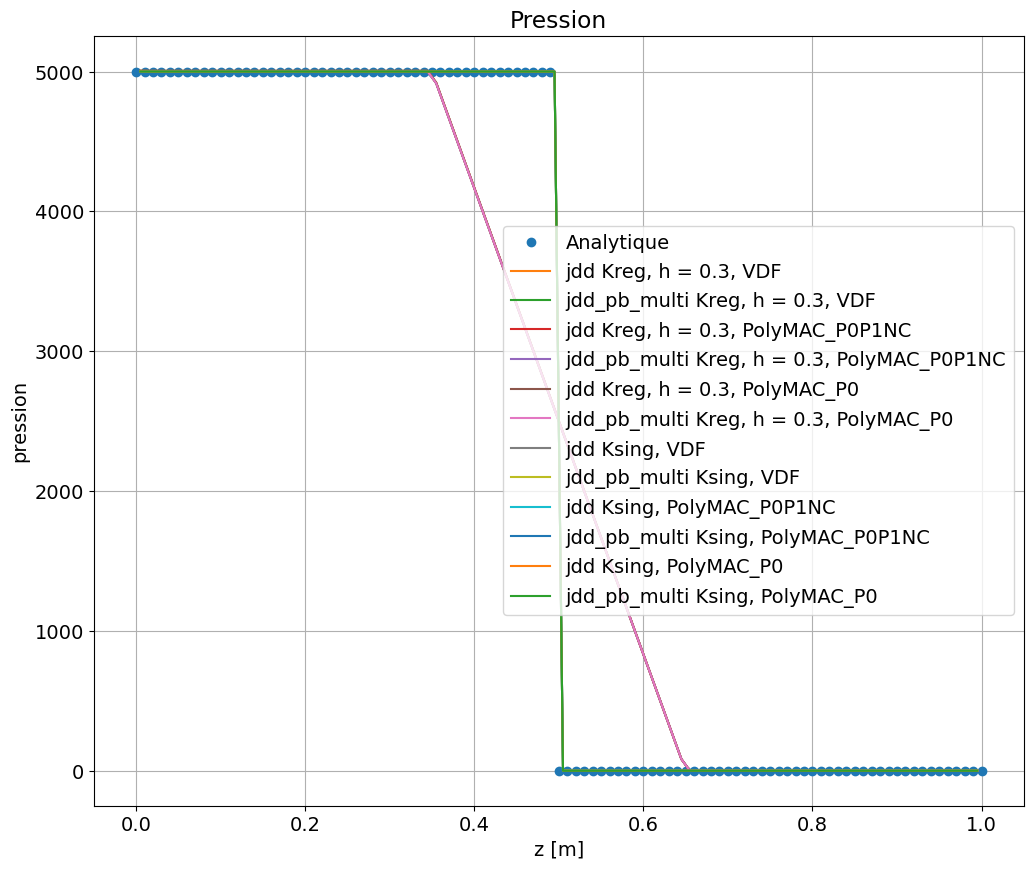

In [16]:
a = plot.Graph("Pression")

x = [i / 100 for i in range(101)]
dp = [0.5 * 1000.0 * k if x_ < z_grid else 0.0 for x_ in x]
a.add(x, dp, label="Analytique", marker="o")
for i, h in enumerate([f"{h_:3.1f}" for h_ in h_grids] + ["Ks"]):
    for dis, jdds in list_dis.items():
        for jdd in jdds:
            l = "Ksing" if h == "Ks" else f"Kreg, h = {h}"
            a.addSegment(f"{run.BUILD_DIRECTORY}/{dis}/case_{h}/{jdd[:-5]}_P.son", label=f"{jdd[:-5]} {l}, {dis}")
            a.label("z [m]", "pression")
